<a href="https://colab.research.google.com/github/JayNguyen-123/Next-words-Prediction/blob/main/NextWordsPrediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential



In [ ]:
df = pd.read_csv('/content/medium_data.csv')
df.head()


,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [ ]:
print("Number of records: ", df.shape[0])
print("Number of fields: ", df.shape[1])


Number of records:  6508
Number of fields:  10


In [ ]:
df['title']


,title
0,A Beginner’s Guide to Word Embedding with Gens...
1,Hands-on Graph Neural Networks with PyTorch & ...
2,How to Use ggplot2 in Python
3,Databricks: How to Save Files in CSV on Your L...
4,A Step-by-Step Implementation of Gradient Desc...
...,...
6503,“We” vs “I” — How Should You Talk About Yourse...
6504,How Donald Trump Markets Himself
6505,Content and Marketing Beyond Mass Consumption
6506,5 Questions All Copywriters Should Ask Clients...


In [ ]:
# Remove some unwanted and irrelevant words
df['title'] = df['title'].apply(lambda x: x.replace(u'\xa0', u' '))
df['title'] = df['title'].apply(lambda x: x.replace('u200a', ' '))



In [ ]:
# Tokenization
tokenizer = Tokenizer(oov_token='oov') # for those words which are not found in word_index
tokenizer.fit_on_texts(df['title'])
total_words = len(tokenizer.word_index) + 1


In [ ]:
# Titles text into sequences and make n_gram model(A continuous run of n-title tokens is called an n-gram.)
input_sequences = []
for line in df['title']:
  token_list = tokenizer.texts_to_sequences([line])[0]

  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print("Total input sequences: ", len(input_sequences))


Total input sequences:  47594


In [ ]:
# Make all titles the same length by using padding
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 665,  65],
      dtype=int32)

In [ ]:
# Create features and labels
X, labels = input_sequences[:, :-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(labels, num_classes=total_words)

print(X[5])
print(labels[5])
print(y[5][14])



[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    5  665   65    2  448 1493]
14
1.0


In [ ]:
# Bi-LSTM neural network mode
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
#adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 318s 210ms/step - accuracy: 0.0557 - loss: 7.3404
Epoch 2/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 336s 220ms/step - accuracy: 0.1291 - loss: 6.3030
Epoch 3/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 377s 217ms/step - accuracy: 0.1585 - loss: 5.7474
Epoch 4/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 381s 216ms/step - accuracy: 0.1863 - loss: 5.2426
Epoch 5/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 364s 204ms/step - accuracy: 0.2084 - loss: 4.7779
Epoch 6/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 332s 211ms/step - accuracy: 0.2409 - loss: 4.3332
Epoch 7/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 317s 213ms/step - accuracy: 0.2883 - loss: 3.9004
Epoch 8/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 322s 213ms/step - accuracy: 0.3391 - loss: 3.5221
Epoch 9/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 318s 213ms/step - accuracy: 0.4025 - loss: 3.1319
Epoch 10/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 325s 216ms/step - accuracy: 0.4567 - loss: 2.8139
Epoch 11/20
1488/1488 ━━━━━━━━━━━━━━━━━━━━ 320s 214ms/step - accuracy: 0.5092 -

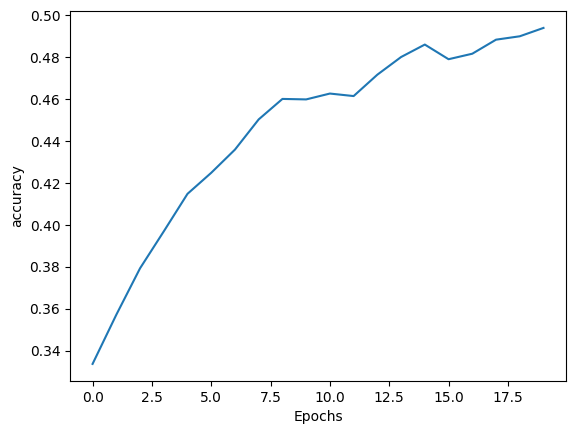

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(hist, string):
  plt.plot(hist.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(hist, 'accuracy')


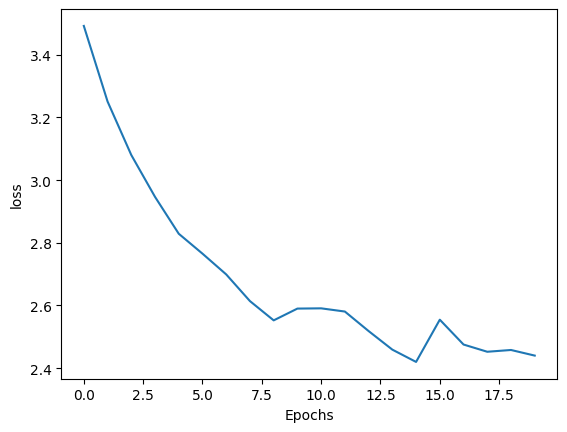

In [ ]:
plot_graphs(hist, 'loss')


In [ ]:
seed_text = "How i learned to be "
next_words = 2

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences(
        [token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_probs = model.predict(token_list)
    predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
    seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Next predicted words: How i learned to be  a successful
